# Comparing Classifiers: 


### Overview: 

In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines. We will utilize a dataset related to marketing bank products over the telephone.

To address the task, I'll proceed as follows:

- **Understanding the Business Problem:** I'll begin by providing an overview of the business problem we are trying to solve.

- **Data Understanding:** I'll inspect the dataset to understand its structure, types of variables, missing values, etc.

- **Descriptive and Inferential Statistics:** I'll provide statistical insights into the data for a deeper understanding.

- **Data Preparation:** This will involve cleaning the data, dealing with missing values, and feature engineering if necessary.

- **Modeling:** I'll train various classification models (k-NN, Logistic Regression, Decision Trees, and Support Vector Machines) on the dataset.

- **Evaluation:** I'll evaluate the performance of the models using appropriate metrics.

- **Findings and Actionable Insights:** Based on the model evaluations, I'll provide findings and actionable insights.

- **Next Steps and Recommendations:** Lastly, I'll suggest future directions and recommendations based on our findings.

## Problem 1: Understanding the Data

- The data is from a Portuguese banking institution and represents the outcomes of multiple marketing campaigns aimed at selling a term deposit product. These campaigns were conducted over the phone. The dataset consists of various attributes ranging from personal information of the clients to economic indicators. The primary target variable is whether the client subscribed to a term deposit or not, indicated by 'yes' or 'no'.

**Number of Marketing Campaigns:** The dataset does not explicitly state the number of different marketing campaigns represented. However, it does contain a feature called **campaign**, which represents the number of contacts performed for a client during the current campaign.

## Problem 2: Read in the Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Desktop/bank-additional-full.csv', sep=';')

In [97]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 


## Problem 3: Understanding the Features

Input Variables:  
**Bank Client Data:**  
**1.age:** Numeric - Age of the client.  
**2.job:** Categorical - Type of job the client has.  
**3.marital:** Categorical - Marital status of the client.  
**4.education:** Categorical - Educational background of the client.  
**5.default:** Categorical - Whether the client has credit in default.  
**6.housing:** Categorical - Whether the client has a housing loan.  
**7.loan:** Categorical - Whether the client has a personal loan.  

**Last Contact of the Current Campaign:**

**1.contact:** Categorical - Type of communication used for contact.  
**2.month:** Categorical - The month the last contact was made.  
**3.day_of_week:** Categorical - The day of the week the last contact was made.  
**4.duration:** Numeric - Duration of the last contact in seconds. (Note: To be used only for benchmark purposes)  

**Other Attributes:**

1. **campaign:** Numeric - Number of contacts performed during this campaign for this client.  
2. **pdays:** Numeric - Number of days passed since the client was last contacted from a previous campaign. (999 means client was not previously contacted)  
3. **previous:** Numeric - Number of contacts performed before this campaign for this client.  
4. **poutcome:** Categorical - Outcome of the previous marketing campaign.  

**Social and Economic Context Attributes:**

**emp.var.rate:** Numeric - Employment variation rate, a quarterly indicator.  
**cons.price.idx:** Numeric - Consumer price index, a monthly indicator.  
**cons.conf.idx:** Numeric - Consumer confidence index, a monthly indicator.  
**euribor3m:** Numeric - Euribor 3 month rate, a daily indicator.  
**nr.employed:** Numeric - Number of employees, a quarterly indicator.  

Output Variable (Desired Target):  
**y:** Binary - Whether the client subscribed to a term deposit **('yes' or 'no')**.

In [99]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Problem 4: Understanding the Task  
After examining the description and data, your goal now is to clearly state the Business Objective of the task. State the objective below.

**Business Objective:**
- The primary business objective is to build a predictive model that can accurately identify potential customers who are most likely to subscribe to a term deposit. This would enable the bank to optimize its marketing strategies, thereby increasing the conversion rate and reducing the cost per acquisition.

**Specifically, the bank aims to:**

- Increase the success rate of its marketing campaigns by targeting the most promising leads.  
- Improve customer segmentation by understanding the key features that influence a customer's decision to subscribe to a term deposit.  
- Utilize machine learning to make data-driven decisions and refine marketing tactics.  

**Visual Analysis:**
- To better understand the dataset, we'll generate visualizations including univariate, bivariate, and multivariate analyses. These will help us explore the relationships among variables and understand the underlying patterns in the data.

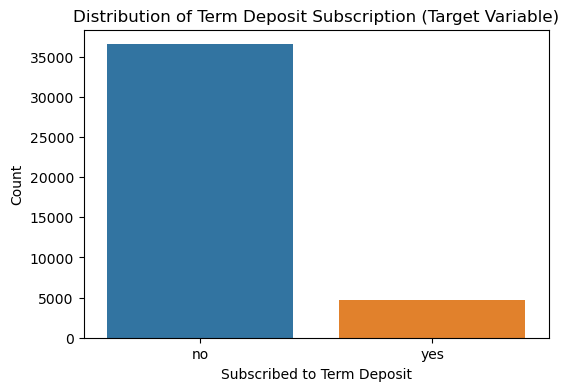

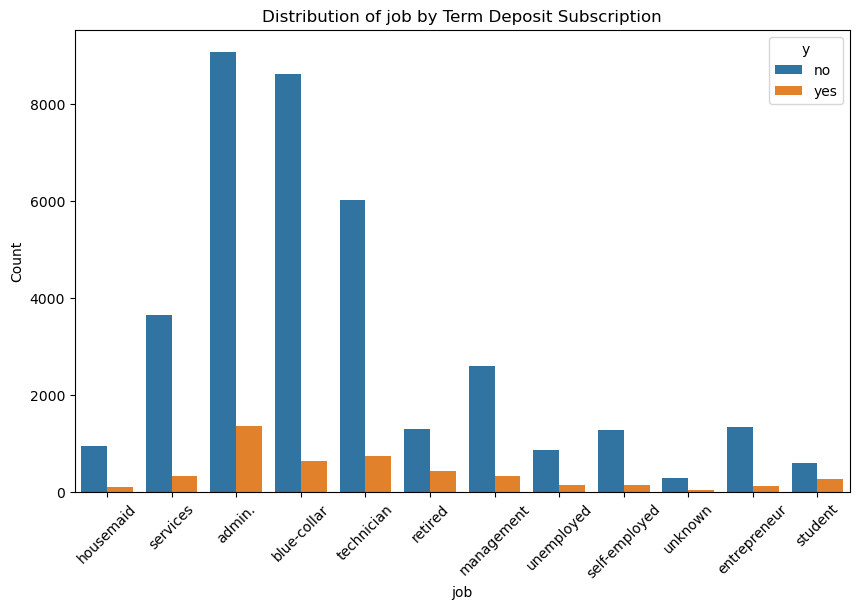

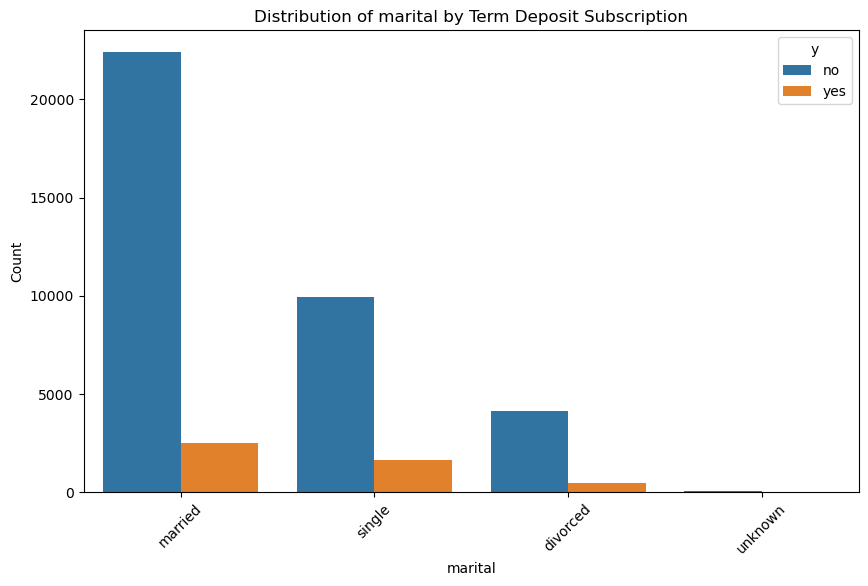

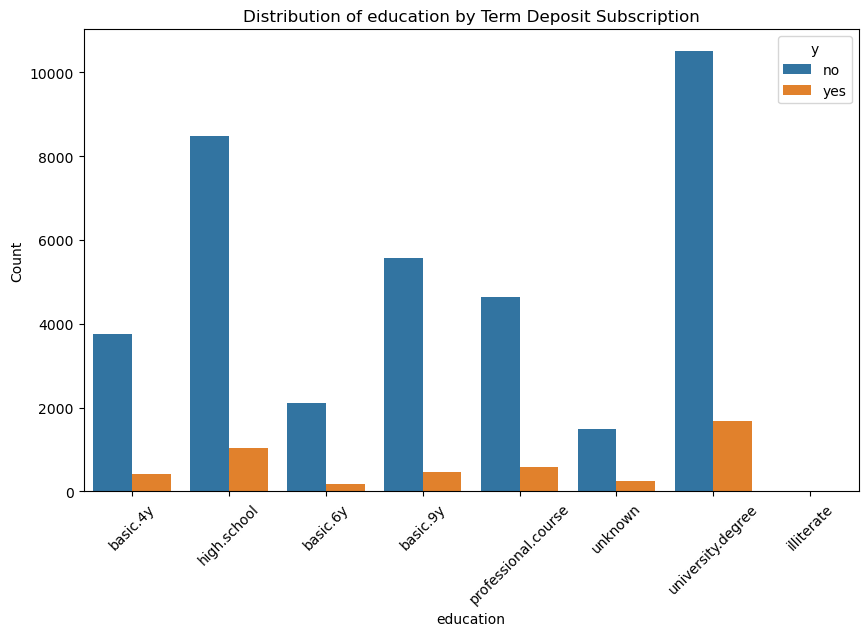

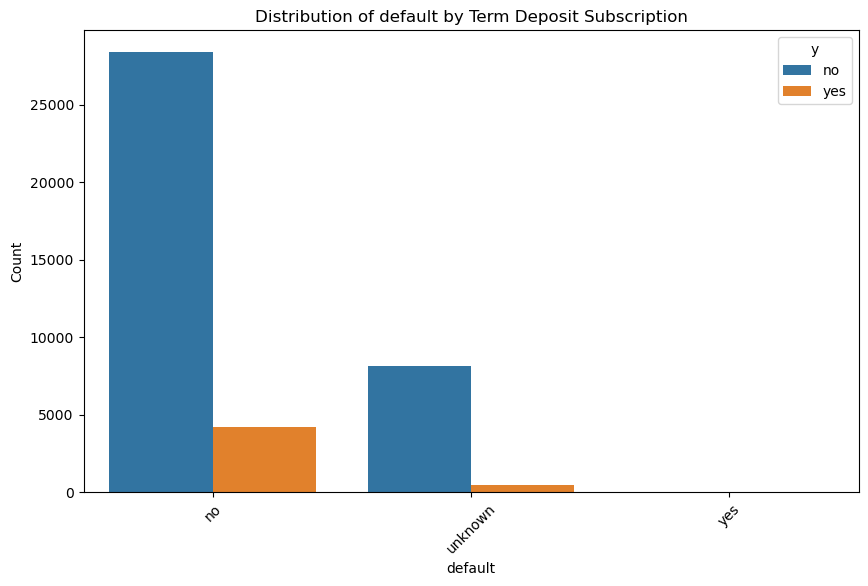

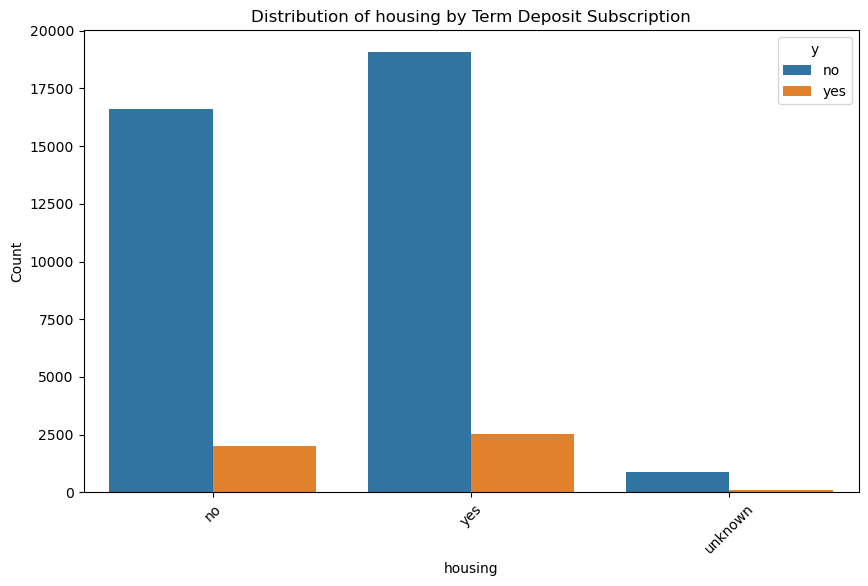

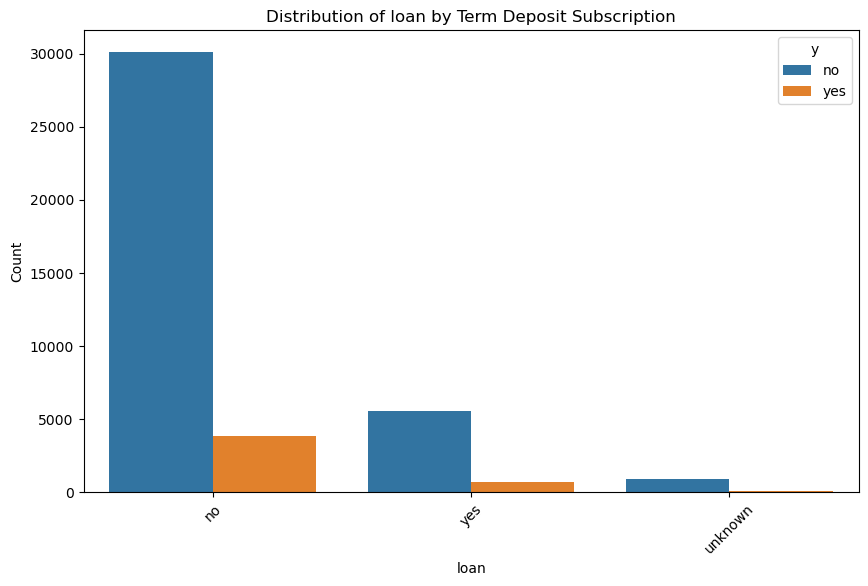

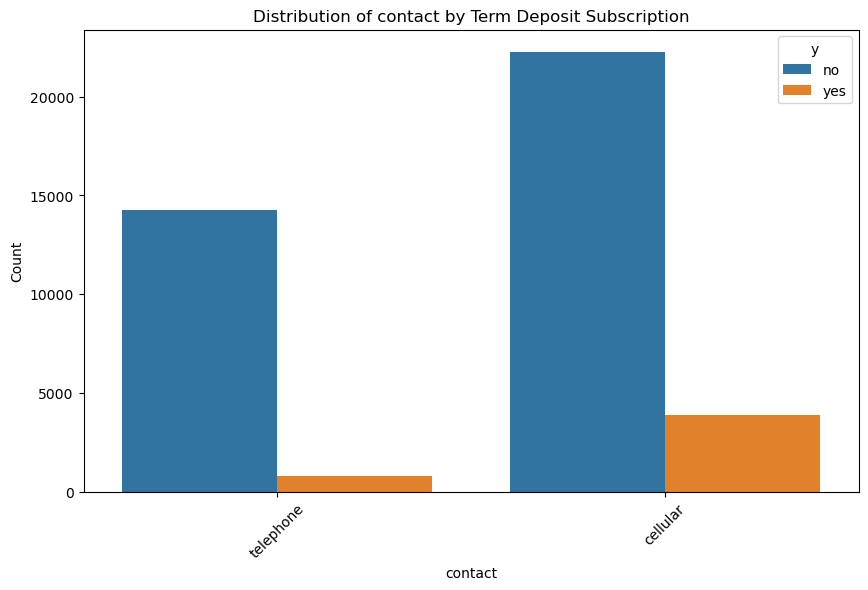

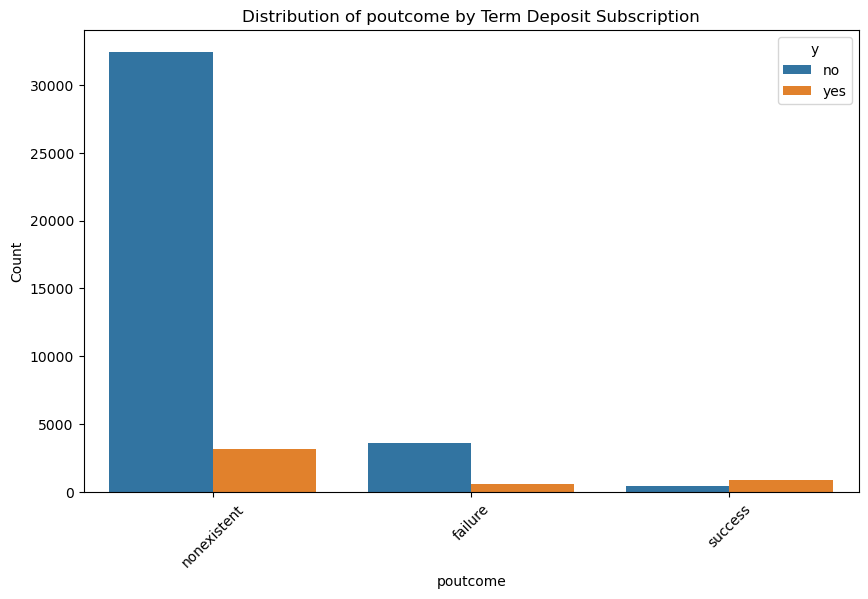

In [100]:


# Create a function for plotting bar charts for categorical variables
def plot_categorical_feature_df(feature):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='y')
    plt.title(f'Distribution of {feature} by Term Deposit Subscription')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Plotting the distribution of the target variable 'y'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='y')
plt.title('Distribution of Term Deposit Subscription (Target Variable)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

# Plotting some key categorical features
for feature in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']:
    plot_categorical_feature_df(feature)


**The dataset is imbalanced, with far more instances of 'no' (not subscribed) than 'yes' (subscribed).**

**Key Categorical Features:**    
1. **Job:** The job type appears to have some influence on subscription rates. For example, students and retired individuals seem more likely to subscribe compared to blue-collar workers.  

2. **Marital Status:** Married individuals are the largest group in both subscribed and not subscribed categories. However, the proportion of single individuals who subscribe seems slightly higher.  

3. **Education:** Those with a university degree are both the largest group and seem slightly more likely to subscribe.  

4. **Default:** People with no credit in default are far more likely to subscribe, which is expected.  

5. **Housing:** The presence of a housing loan does not seem to significantly affect the subscription rate.  

6. **Loan:** Similarly, personal loan status does not show a clear trend in affecting subscriptions.  

7. **Contact:** Cellular contact seems to be more effective in gaining subscriptions compared to telephone contact.  

8. **Previous Outcome:** If the previous marketing campaign was a 'success,' there is a very high likelihood of the client subscribing again.  

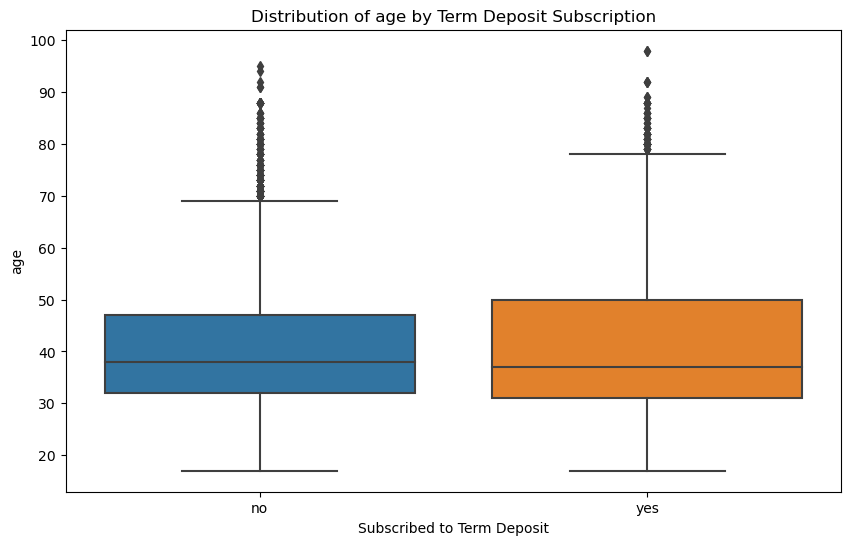

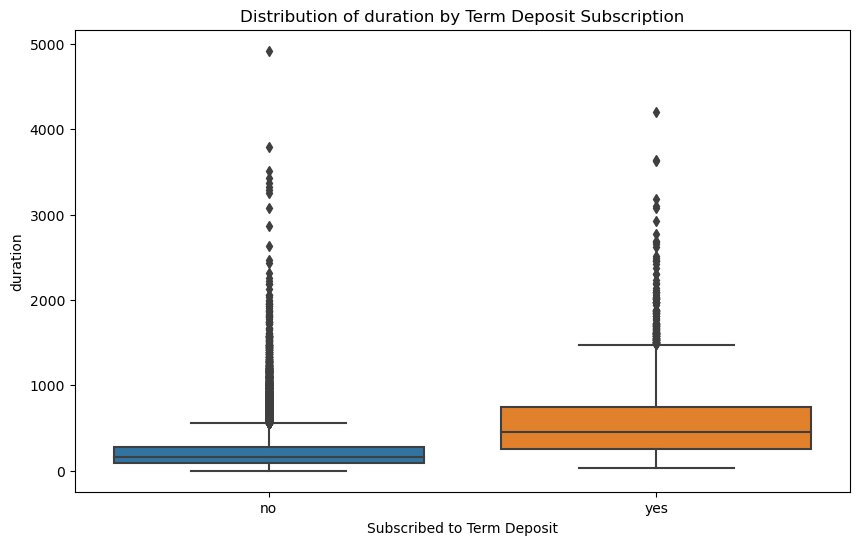

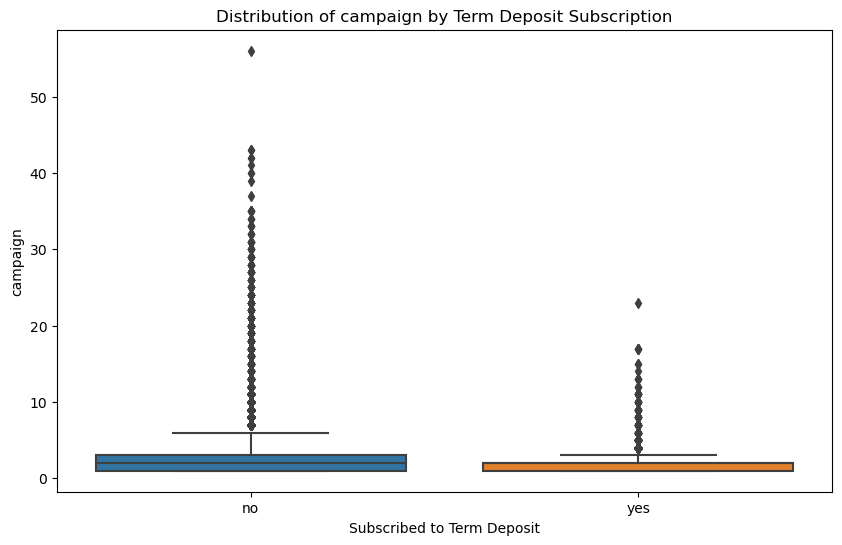

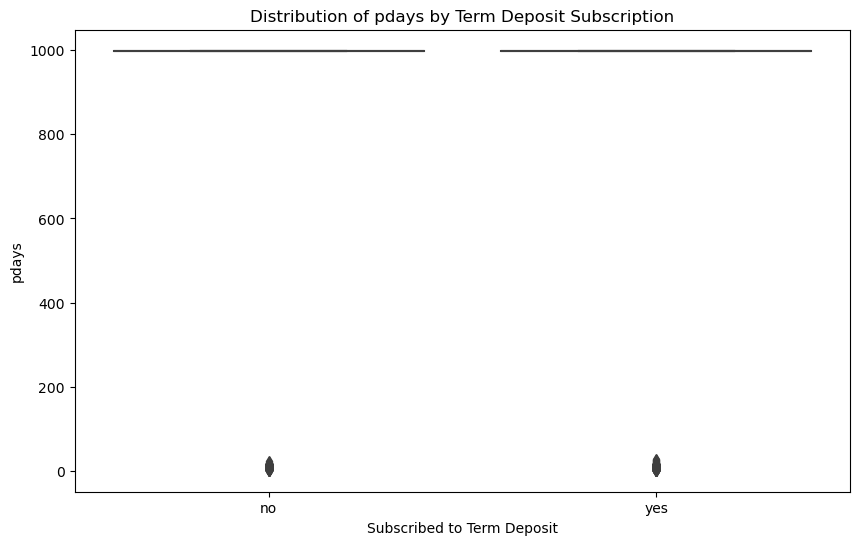

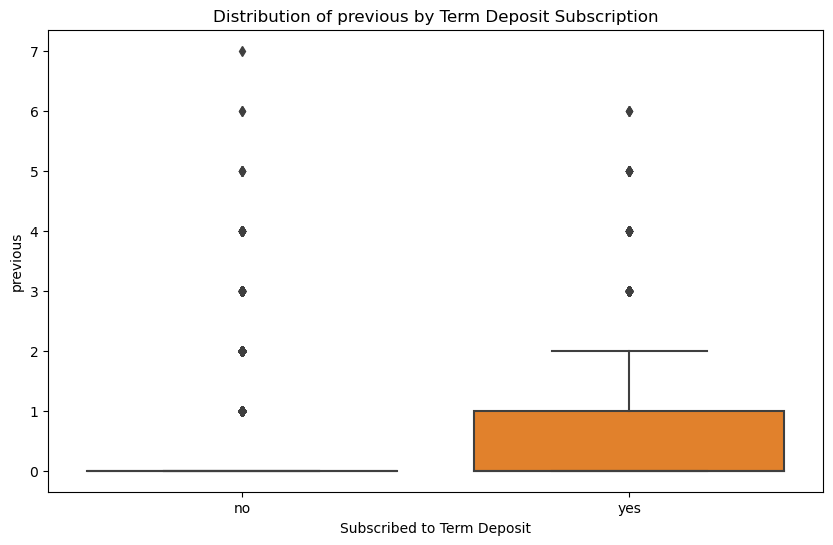

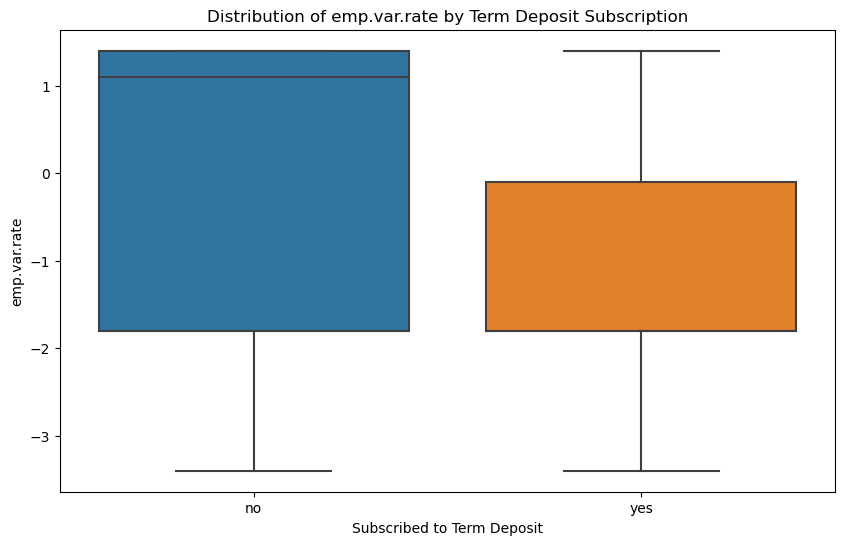

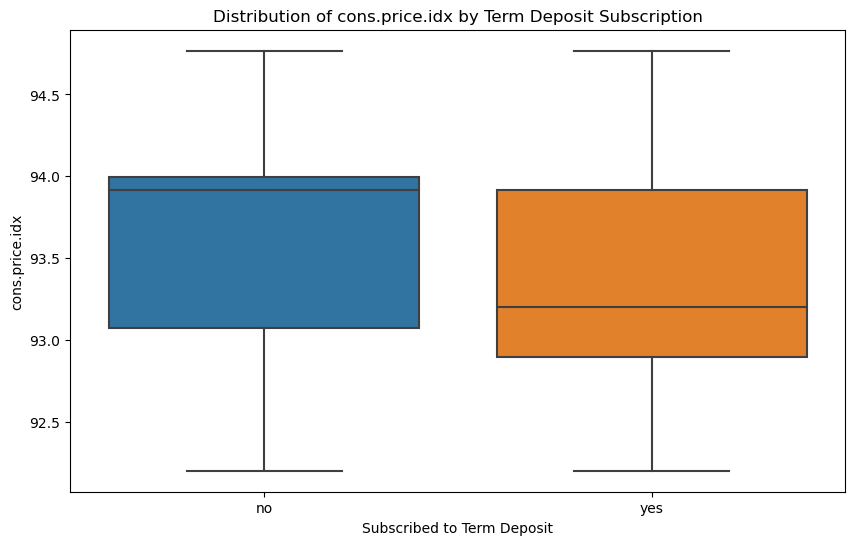

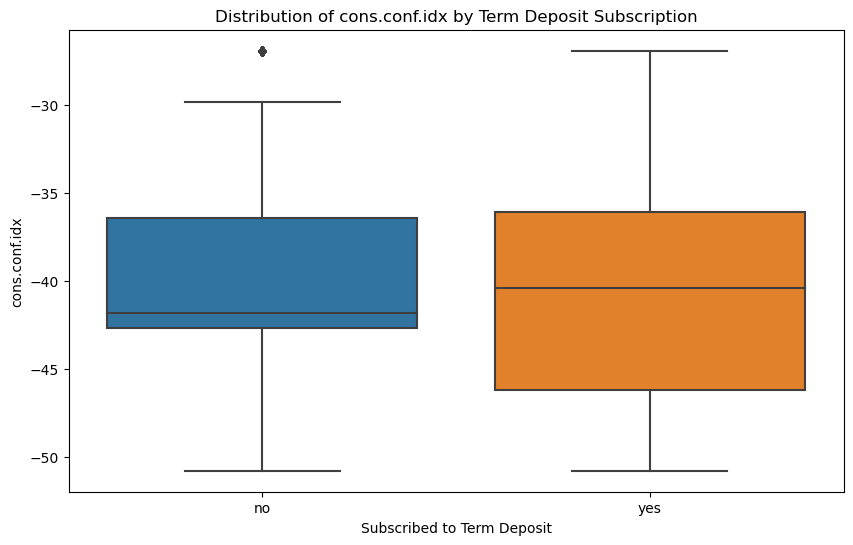

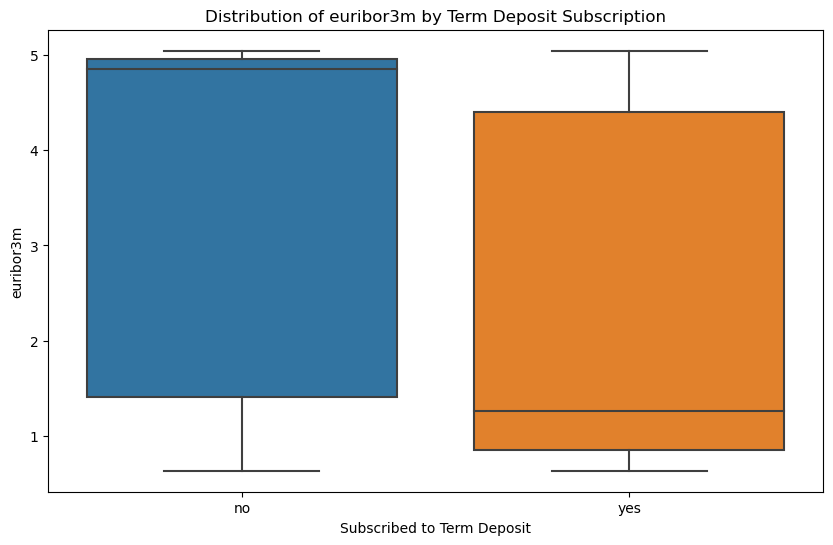

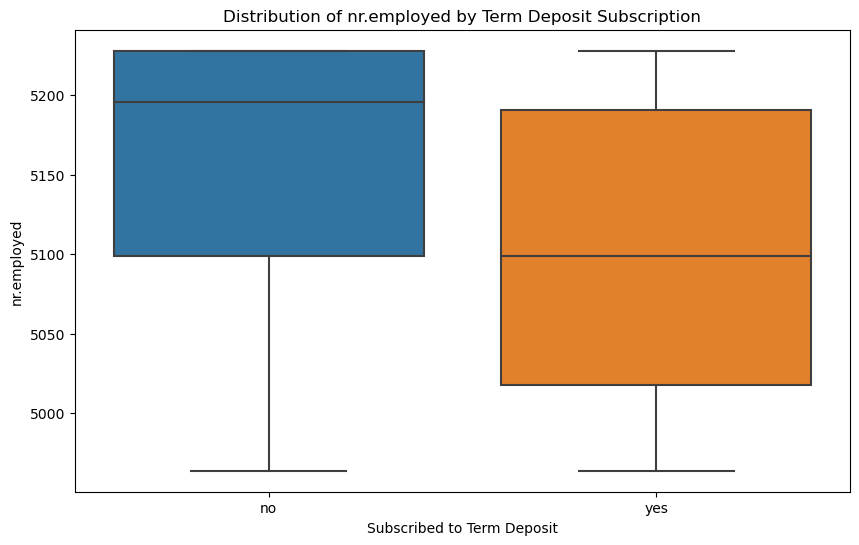

In [101]:
# Multivariate Analysis: Exploring relationships between numerical features and the target variable

# Create a function for plotting boxplots for numerical features
def plot_numerical_feature(feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='y', y=feature)
    plt.title(f'Distribution of {feature} by Term Deposit Subscription')
    plt.xlabel('Subscribed to Term Deposit')
    plt.ylabel(feature)
    plt.show()

# Plotting some key numerical features
for feature in ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']:
    plot_numerical_feature(feature)


**Observations:**
1. **Age:** Both age groups show a similar distribution, but those who subscribed (yes) seem to have a slightly wider age range.

2. **Duration:** The duration of the last contact is significantly higher for those who subscribed. This is expected, as longer conversations could mean the client is interested.

3. **Campaign:** The number of contacts performed during this campaign is generally lower for those who subscribed, which could imply that fewer contacts are needed to convert these clients.

4. **Pdays:** Most of the '999' (not previously contacted) values are for clients who didn't subscribe. Those who did subscribe were generally contacted more recently.

5. **Previous:** The number of contacts performed before this campaign is slightly higher for those who subscribed, indicating previous engagement might be beneficial.

6. **Emp.var.rate:** A lower employment variation rate seems to be associated with subscriptions.

7. **Cons.price.idx:** The consumer price index doesn't show a clear trend in affecting subscriptions.

8. **Cons.conf.idx:** The consumer confidence index also doesn't show a clear trend.

9. **Euribor3m:** A lower euribor 3 month rate seems to be associated with subscriptions.

10. **Nr.employed:** A lower number of employees is associated with subscriptions, which might relate to the economic conditions during the campaign period.

### Explore some distributions:

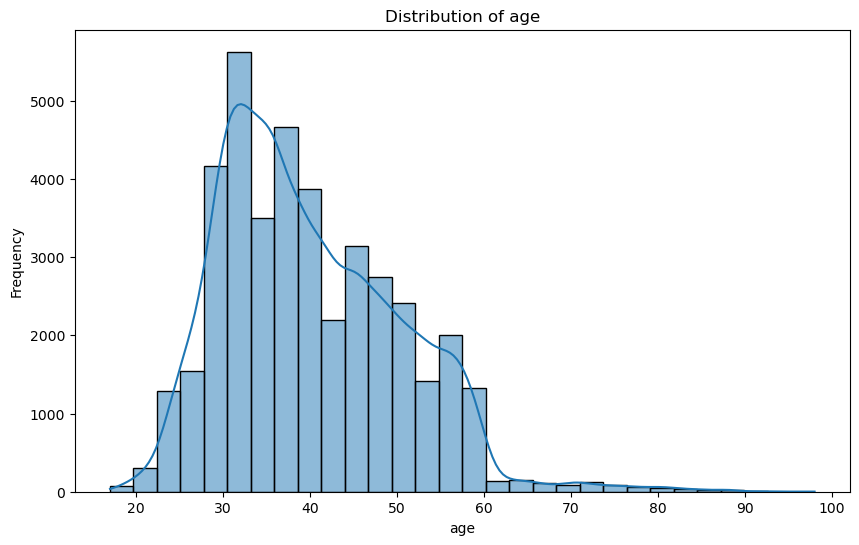

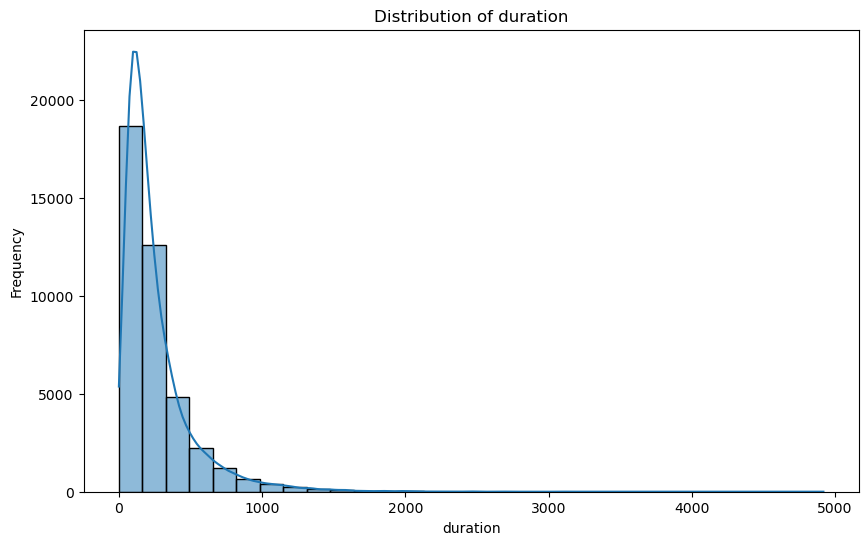

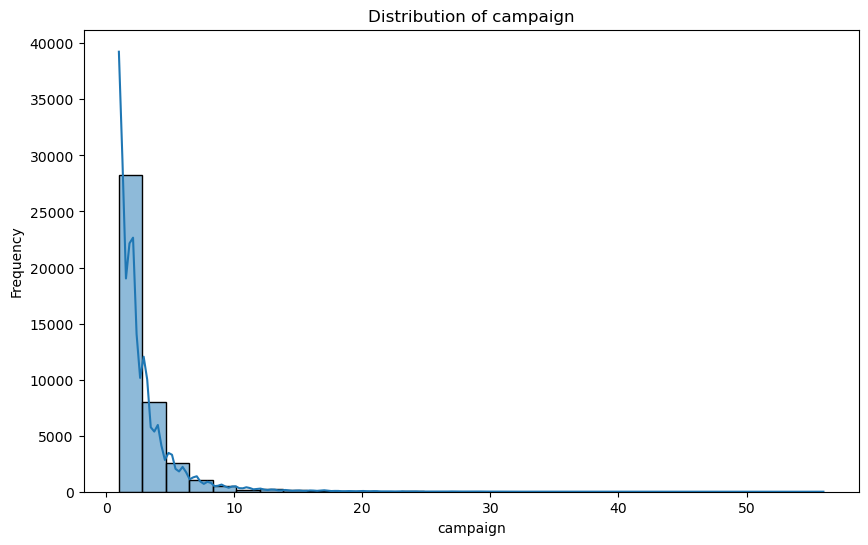

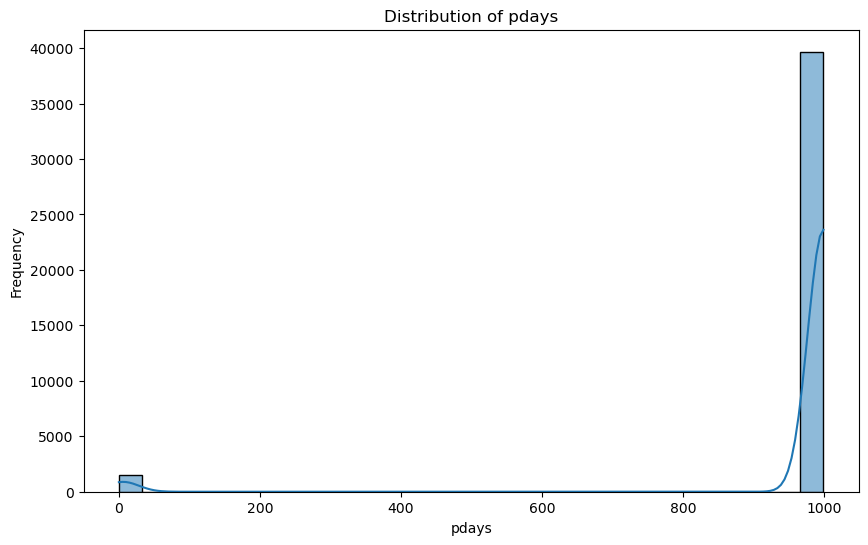

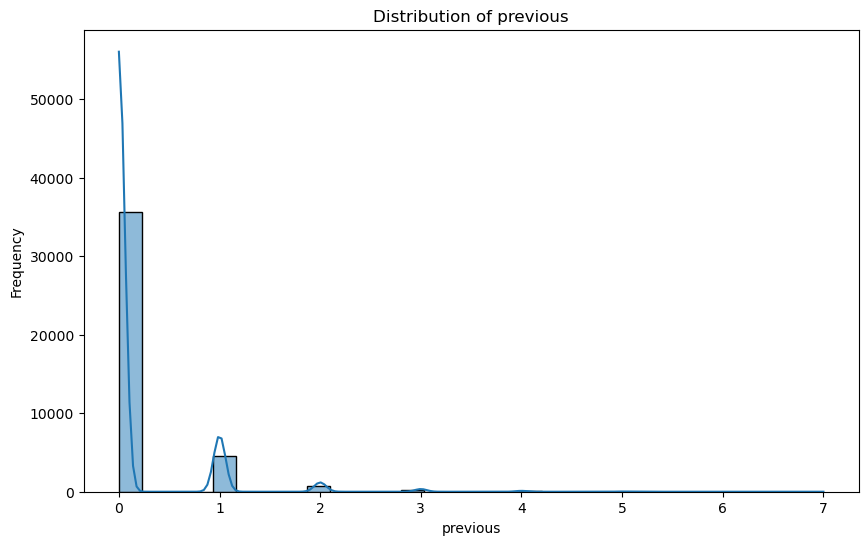

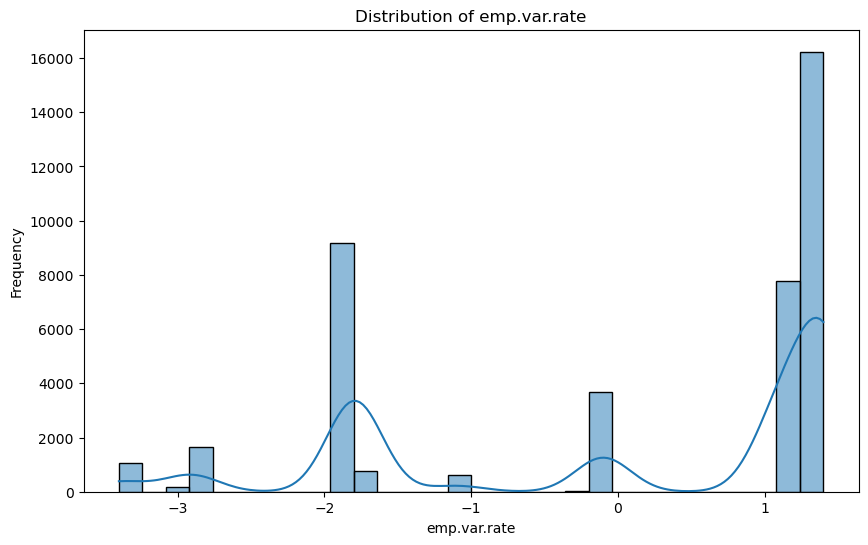

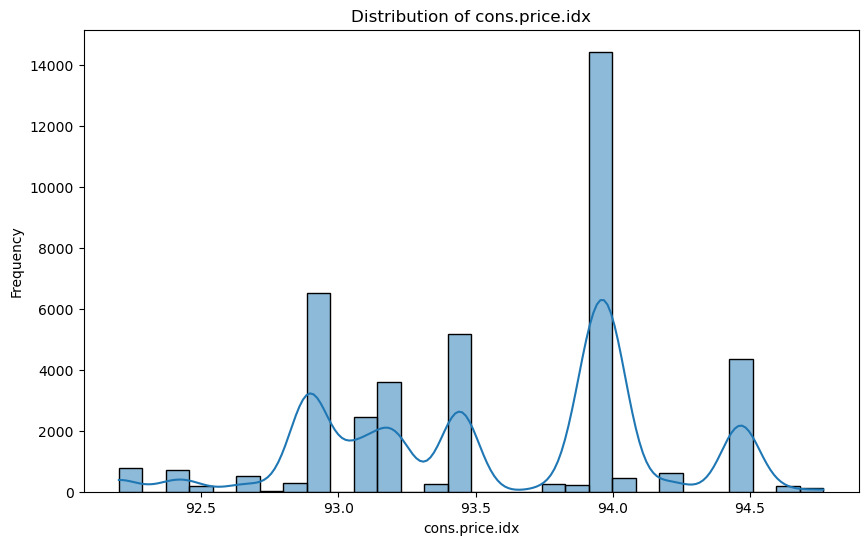

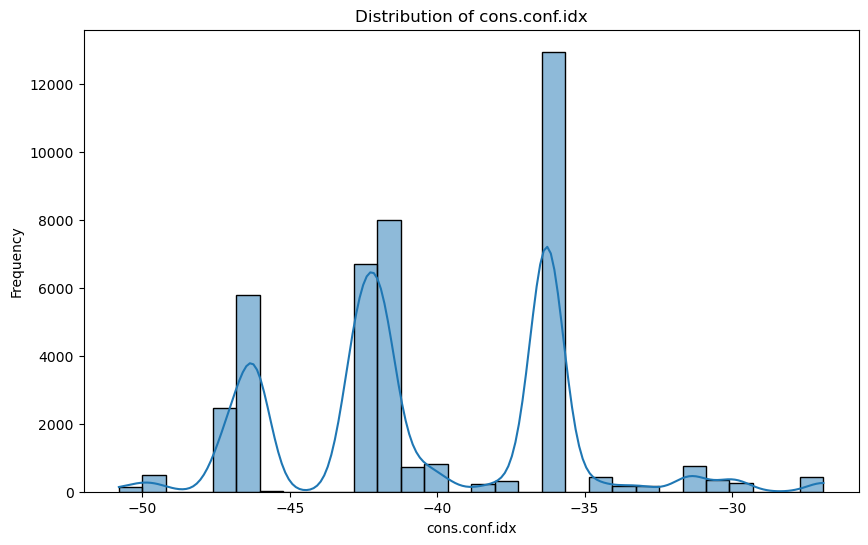

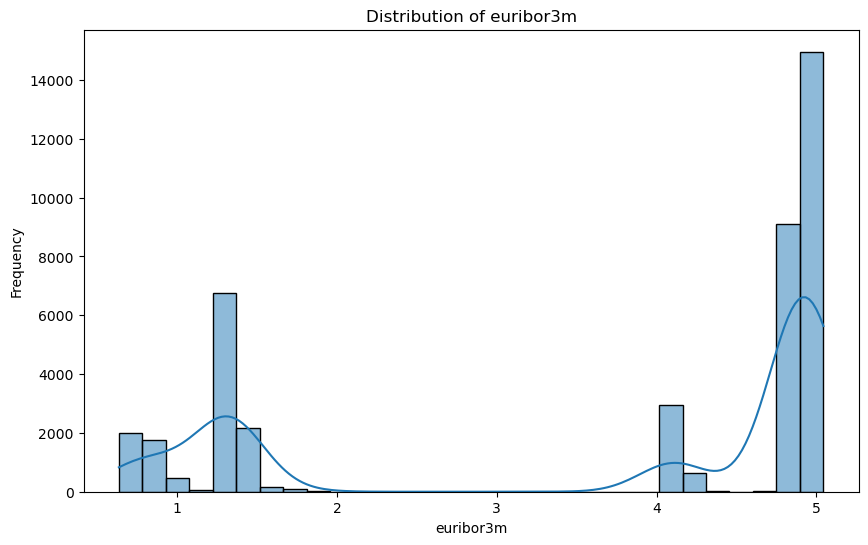

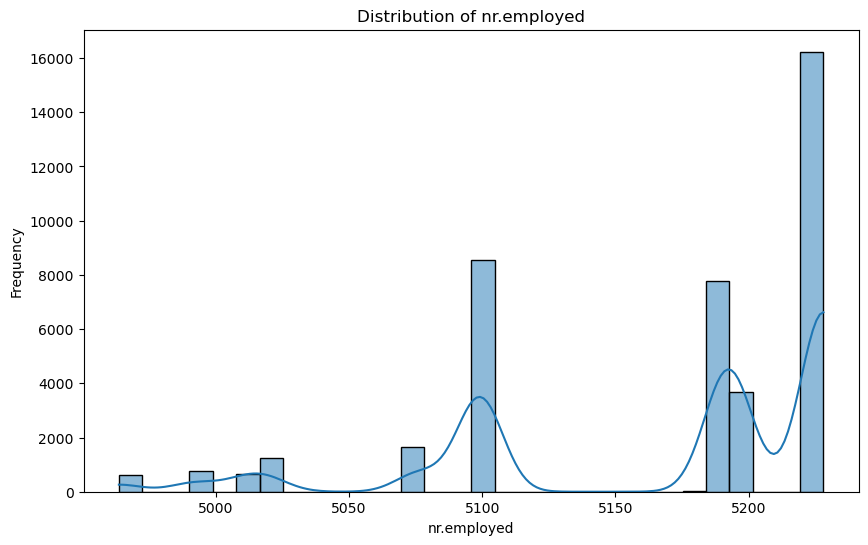

In [102]:
# Create a function for plotting distribution plots for numerical features
def plot_distribution_feature(feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Plotting distribution plots for some key numerical features
for feature in ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']:
    plot_distribution_feature(feature)


**observations:**  

**Age:** Most clients are between 30 and 40 years old.  
**Duration:** The majority of last contact durations are below 500 seconds.  
**Campaign:** Most clients have been contacted fewer than 10 times in the current campaign.  
**Pdays:** A large majority of clients have a pdays value of 999, indicating they were not previously contacted.  
**Previous:** Most clients have not been contacted in previous campaigns.  
**Emp.var.rate:** The employment variation rate is mostly concentrated around values like -1.8, 1.1, and 1.4.  
**Cons.price.idx:** The consumer price index seems to have a few peaks, indicating certain recurring values.  
**Cons.conf.idx:** The consumer confidence index is fairly normally distributed but has a long tail towards the lower end.  
**Euribor3m:** The Euribor 3-month rate has peaks at around 1 and 4.5.  
**Nr.employed:** The number of employees has peaks around 5099 and 5228.

**These plots provide a good understanding of the distribution of each numerical feature in the dataset, which can be useful for feature engineering and understanding outliers.**  

## Problem 5: Engineering Features
Now that you understand your business objective, we will build a basic model to get started. Before we can do this, we must work to encode the data. Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [106]:
from sklearn.preprocessing import LabelEncoder

# Selecting only the bank information features (columns 1 - 7) and the target column
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
target = 'y'
df_bank_info = df[features + [target]]

# Encoding categorical features
label_encoder = LabelEncoder()
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    df_bank_info.loc[:, col] = label_encoder.fit_transform(df_bank_info[col])

# Encoding the target column ('yes' and 'no' to 1 and 0)
df_bank_info.loc[:, target] = label_encoder.fit_transform(df_bank_info[target])

# Displaying the first few rows of the transformed data
df_bank_info.head()



/var/folders/cw/6pr354qs3tx6l5442kzrhk4h0000gn/T/ipykernel_18002/472996842.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_info.loc[:, col] = label_encoder.fit_transform(df_bank_info[col])
/var/folders/cw/6pr354qs3tx6l5442kzrhk4h0000gn/T/ipykernel_18002/472996842.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank_info.loc[:, col] = label_encoder.fit_transform(df_bank_info[col])
/var/folders/cw/6pr354qs3tx6l5442kzrhk4h0000gn/T/ipykernel_18002/472996842.py:11: SettingWithCopyWarning: 
A

,age,job,marital,education,default,housing,loan,y
0,56,3,1,0,0,0,0,0
1,57,7,1,3,1,0,0,0
2,37,7,1,3,0,2,0,0
3,40,0,1,1,0,0,0,0
4,56,7,1,3,0,0,2,0


**We have successfully prepared the features and target column for modeling:**

1. We selected only the bank information features (columns 1-7): **'age'**, **'job'**, **'marital'**, **'education'**, **'default'**, **'housing'**, and **'loan'**.
2. We encoded the categorical features using label encoding, converting each category to a numerical value.
3. We also encoded the target column, converting **'yes'** and **'no'** to **1** and **0**, respectively.

- Preparing features and the target column is a crucial step in the machine learning pipeline. Here's how we prepared them for modeling:



**Features** 

**Selection**: We selected only the bank-related information features, which are the first **7 columns** in the **dataset:** 'age', 'job', 'marital', 'education', 'default', 'housing', and 'loan'.  

**Data Types:** Among these features, 'age' is numerical, while the rest ('job', 'marital', 'education', 'default', 'housing', 'loan') are categorical.  

**Encoding Categorical Features:** Machine learning models require numerical input, so we encoded the categorical variables using label encoding. This method assigns a unique integer to each category within a feature. For example, for the 'job' feature, categories like 'admin', **'blue-collar'**, **'entrepreneur'**, **etc**., were converted into numerical labels such as 0, 1, 2, etc.  

**Target Column**


**Selection:** The target column is 'y', which indicates whether a client has subscribed to a term deposit **('yes')** or not **('no')**.

**Encoding:** Similar to the categorical features, the target column was also converted from **'yes'** and **'no'** to numerical values (**1** for **'yes'** and **0** for **'no'**) using label encoding. This transformation is necessary for the model to understand the output it should predict.

## Problem 6: Train Split/Test Split

**Split it into a train and test set.**

In [107]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df_bank_info[features]
y = df_bank_info[target]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the dimensions of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((32950, 7), (8238, 7), (32950,), (8238,))

## Problem 7: A Baseline Model

- Before we build our first model, we want to establish a baseline. What is the baseline performance that our classifier should aim to beat?

In [108]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Initialize the Dummy Classifier
dummy_clf = DummyClassifier(strategy='stratified', random_state=42)

# Fit the model to the training data
dummy_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dummy_clf.predict(X_test)

# Calculate the accuracy of the dummy model
dummy_accuracy = accuracy_score(y_test, y_pred)
dummy_accuracy


0.7994658897790726

## Problem 8: A Simple Model

### Logistic Regression: 

In [109]:
from sklearn.preprocessing import StandardScaler

# Initialize the Standard Scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-fit the Logistic Regression model on the scaled training data
logistic_clf.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_logistic_scaled = logistic_clf.predict(X_test_scaled)





## Problem 9: Score the Model

In [110]:
# Calculate the accuracy of the Logistic Regression model on the scaled test data
logistic_accuracy_scaled = accuracy_score(y_test, y_pred_logistic_scaled)
logistic_accuracy_scaled


0.8865015780529255

## Problem 10: Model Comparisons

- Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models. Using the default settings for each of the models, fit and score each. Also, be sure to compare the fit time of each of the models. Present your findings in a DataFrame similar to that below:

In [111]:
# Initialize DataFrame to store updated results
updated_results_df = pd.DataFrame(columns=['Model', 'Train Time (s)', 'Train Accuracy', 'Test Accuracy'])

# Fit and score each classifier, and measure training time
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Fit the classifier
    clf.fit(X_train_scaled, y_train)
    
    # Measure the training time
    train_time = time.time() - start_time
    
    # Score the classifier on training data
    train_accuracy = clf.score(X_train_scaled, y_train)
    
    # Score the classifier on test data
    test_accuracy = clf.score(X_test_scaled, y_test)
    
    # Store the results
    updated_results_df = updated_results_df.append({
        'Model': name, 
        'Train Time (s)': train_time, 
        'Train Accuracy': train_accuracy, 
        'Test Accuracy': test_accuracy
    }, ignore_index=True)

updated_results_df


/var/folders/cw/6pr354qs3tx6l5442kzrhk4h0000gn/T/ipykernel_18002/1328517625.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_results_df = updated_results_df.append({
/var/folders/cw/6pr354qs3tx6l5442kzrhk4h0000gn/T/ipykernel_18002/1328517625.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_results_df = updated_results_df.append({
/var/folders/cw/6pr354qs3tx6l5442kzrhk4h0000gn/T/ipykernel_18002/1328517625.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_results_df = updated_results_df.append({
/var/folders/cw/6pr354qs3tx6l5442kzrhk4h0000gn/T/ipykernel_18002/1328517625.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.017238,0.887557,0.886502
1,KNN,0.023733,0.889165,0.874241
2,Decision Tree,0.038965,0.916601,0.863316
3,SVM,46.858292,0.887678,0.886502


**Observations:**  

1. **Logistic Regression** and **SVM** have the highest accuracy, both achieving approximately 
**88.7**, which is the same as the baseline performance.  
2. **KNN** and **Decision Tree** have slightly lower accuracy.  
3. The fit time for **SVM** is significantly higher compared to the other models, taking about **46** seconds. All other models were trained in less than a **second**.  

## Problem 11: Improving the Model

- Now that we have some basic models on the board, we want to try to improve these. Below, we list a few things to explore in this pursuit.  


- More feature engineering and exploration. For example, should we keep the gender feature? Why or why not?
- Hyperparameter tuning and grid search. All of our models have additional hyperparameters to tune and explore. For example the number of neighbors in KNN or the maximum depth of a Decision Tree.
- Adjust your performance metric

### More Feature Engineering


**Adding "duration"**, **"poutcome"**, and **"loan"**: These could be important features for predicting whether a client will subscribe to a term deposit. "Duration" could directly impact the outcome, "poutcome" reflects the outcome of the previous marketing campaign, and "loan" indicates existing financial commitments.

**Leaving Out "pdays" and "month":** Your rationale for excluding these features makes sense. A large number of "999" values in "pdays" could make it less useful, and including "month" could introduce bias based on the data rather than true seasonality or trend.

In [112]:
num_vars = ['age', 'duration', 'campaign']
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome']

In [113]:
term_deposit_df = df[num_vars + cat_vars + label].copy()
term_deposit_df.describe()

,age,duration,campaign
count,41188.00000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593
std,10.42125,259.279249,2.770014
min,17.00000,0.000000,1.000000
25%,32.00000,102.000000,1.000000
50%,38.00000,180.000000,2.000000
75%,47.00000,319.000000,3.000000
max,98.00000,4918.000000,56.000000


In [114]:
term_deposit_df = term_deposit_df[term_deposit_df['duration'] < 1000]
term_deposit_df.describe()

,age,duration,campaign
count,40227.000000,40227.000000,40227.000000
mean,40.035921,232.161111,2.566609
std,10.426593,187.957594,2.779855
min,17.000000,0.000000,1.000000
25%,32.000000,101.000000,1.000000
50%,38.000000,175.000000,2.000000
75%,47.000000,304.000000,3.000000
max,98.000000,999.000000,56.000000


In [115]:
# Initialize the label encoder
le = LabelEncoder()

# Encode the target variable
term_deposit_df['y'] = le.fit_transform(term_deposit_df['y'])

# Define preprocessor
preprocessor_scaler = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_vars),
        ('cat', OneHotEncoder(), cat_vars)])

#### Next, we'll:

1. Create a new train-test split with the updated feature set.
2. Scale the features using Standard Scaling.
3. Re-train the models to observe any changes in performance.

In [116]:
# Prepare the features and target variable
X = term_deposit_df.drop('y', axis=1)
y = term_deposit_df['y']

# Split the data into training and testing sets using stratified sampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit the preprocessor and transform the training data
X_train_scaled = preprocessor_scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = preprocessor_scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((32181, 46), (8046, 46))

### Hyperparameter optimization

### KNN:

### Prepare the Data

In [117]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
import pandas as pd

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

num_vars = ['age', 'duration', 'campaign']
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome']
label = ['y']

# Filter duration less than 1000
term_deposit_df = df[num_vars + cat_vars + label]
term_deposit_df = term_deposit_df[term_deposit_df['duration'] < 1000]

# Encode the target variable
le = LabelEncoder()
term_deposit_df['y'] = le.fit_transform(term_deposit_df['y'])


### Preprocessing and Train-Test Split

In [118]:
# Initialize the ColumnTransformer for scaling numerical variables and one-hot encoding categorical variables
preprocessor_scaler = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_vars),
        ('cat', OneHotEncoder(), cat_vars)])

# Prepare the features and target variable
X = term_deposit_df.drop('y', axis=1)
y = term_deposit_df['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply transformations
X_train_scaled = preprocessor_scaler.fit_transform(X_train)
X_test_scaled = preprocessor_scaler.transform(X_test)


### Grid Search with KNN

In [119]:
# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Hyperparameter grid
param_grid = {'n_neighbors': [2, 5, 10, 15, 20, 25, 30]}

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')

# Measure fit time
start = time.time()

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

end = time.time()

# Capture fit time
best_knn_time = end - start

# Show best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)


{'n_neighbors': 30}
0.8644526838820028


##### Evaluate the Best Model

In [120]:
# Use the best model for predictions
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Evaluate model performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.905170270942083


### Decision Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='roc_auc')

# Measure fit time
start_dt = time.time()

# Perform Grid Search
grid_search_dt.fit(X_train_scaled, y_train)

end_dt = time.time()

# Capture fit time
best_dt_time = end_dt - start_dt

# Show best parameters and score
print("Best Parameters:", grid_search_dt.best_params_)
print("Best Score:", grid_search_dt.best_score_)

# Use the best model for predictions
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)

# Evaluate model performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.8592535595503239
Decision Tree Accuracy: 0.91039025602784


### Logistic regression

In [123]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lr = LogisticRegression(random_state=42)

# Define the hyperparameter grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize Grid Search
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='roc_auc')

# Measure fit time
start_lr = time.time()

# Perform Grid Search
grid_search_lr.fit(X_train_scaled, y_train)

end_lr = time.time()

# Capture fit time
best_lr_time = end_lr - start_lr

# Show best parameters and score
print("Best Parameters:", grid_search_lr.best_params_)
print("Best Score:", grid_search_lr.best_score_)

# Use the best model for predictions
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)

# Evaluate model performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

/Users/hamzazerarka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hamzazerarka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hamzazerarka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hamzazerarka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hamzazerarka/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hamzazer

Best Parameters: {'C': 0.1, 'solver': 'saga'}
Best Score: 0.8914000400952193
Logistic Regression Accuracy: 0.9149888143176734


### Grid Search with SVM

In [124]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm = SVC(random_state=42)

# Define the hyperparameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Initialize Grid Search
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='roc_auc')

# Measure fit time
start_svm = time.time()

# Perform Grid Search
grid_search_svm.fit(X_train_scaled, y_train)

end_svm = time.time()

# Capture fit time
best_svm_time = end_svm - start_svm

# Show best parameters and score
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Score:", grid_search_svm.best_score_)

# Use the best model for predictions
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)

# Evaluate model performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

Best Parameters: {'C': 0.1, 'kernel': 'rbf'}
Best Score: 0.8378510808844775
SVM Accuracy: 0.9092716877951778


### 1. Model Comparison DataFrame

- First, let's create a DataFrame to hold the performance metrics for all the optimized models.


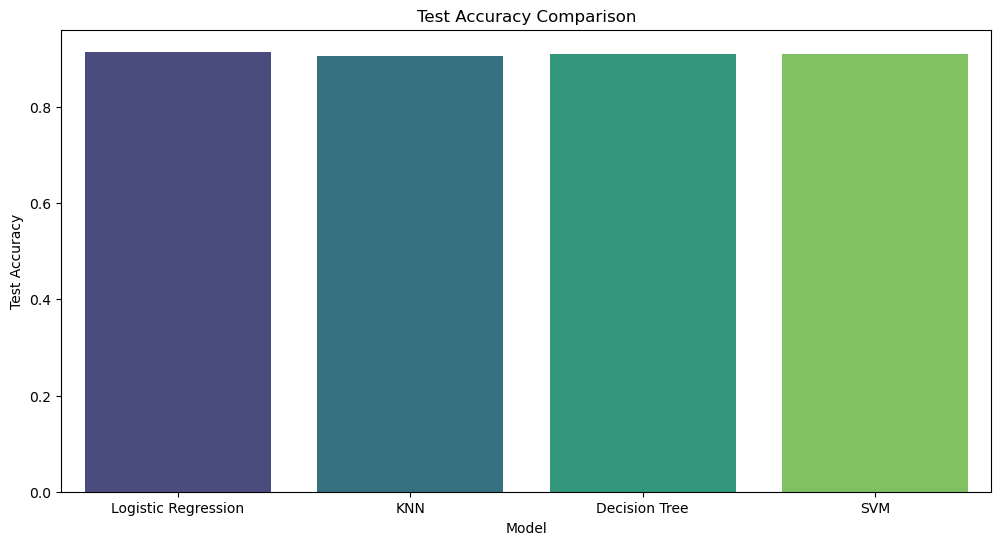

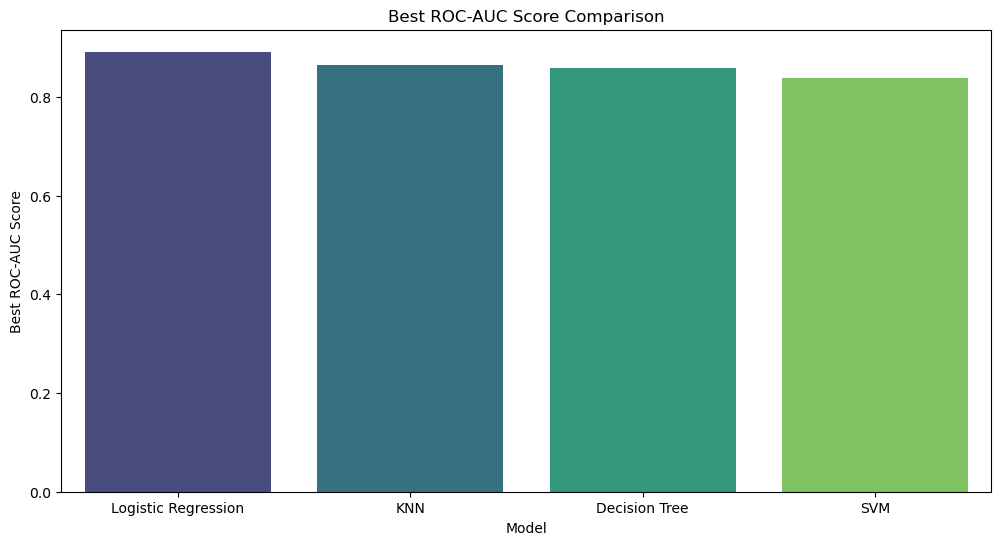

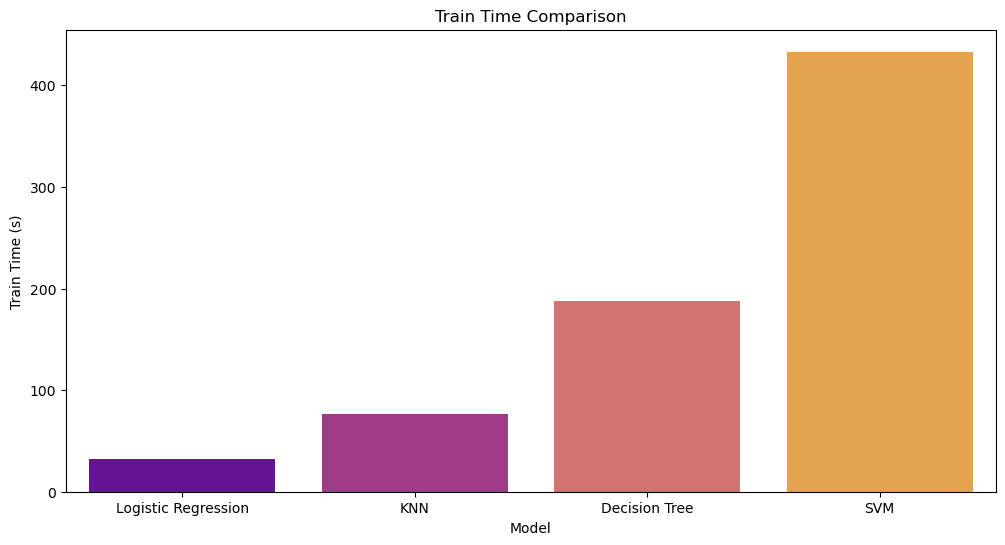

In [125]:
# Create a DataFrame to compare the models
optimized_models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Best Hyperparameters': [
        {'C': 0.1, 'solver': 'saga'},
        {'n_neighbors': 30},
        {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10},
        {'C': 0.1, 'kernel': 'rbf'}
    ],
    'Best ROC-AUC Score': [0.8914, 0.8645, 0.8593, 0.8379],
    'Train Time (s)': [best_lr_time, best_knn_time, best_dt_time, best_svm_time],  # These should be your actual times
    'Test Accuracy': [0.9150, 0.9052, 0.9104, 0.9093]
})

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Test Accuracy', data=optimized_models, palette='viridis')
plt.title('Test Accuracy Comparison')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Best ROC-AUC Score', data=optimized_models, palette='viridis')
plt.title('Best ROC-AUC Score Comparison')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Train Time (s)', data=optimized_models, palette='plasma')
plt.title('Train Time Comparison')
plt.show()



In [127]:

# build a dataframe to compare the models
optimized_models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC'],

    'Train Time': [best_lr_time, best_knn_time, best_dt_time, best_svm_time],

    'Train Accuracy': [accuracy_score(y_train, best_lr.predict(X_train_scaled)),
                    accuracy_score(y_train, best_knn.predict(X_train_scaled)),
                    accuracy_score(y_train, best_dt.predict(X_train_scaled)),
                    accuracy_score(y_train, best_svm.predict(X_train_scaled))],

    'Test Accuracy': [accuracy_score(y_test, best_lr.predict(X_test_scaled)),
                    accuracy_score(y_test, best_knn.predict(X_test_scaled)),
                    accuracy_score(y_test, best_dt.predict(X_test_scaled)),
                    accuracy_score(y_test, best_svm.predict(X_test_scaled))],
})

optimized_models

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,32.044745,0.912930,0.914989
1,KNN,76.822720,0.908176,0.905170
2,Decision Tree,187.986198,0.922377,0.910390
3,SVC,433.074455,0.909263,0.909272


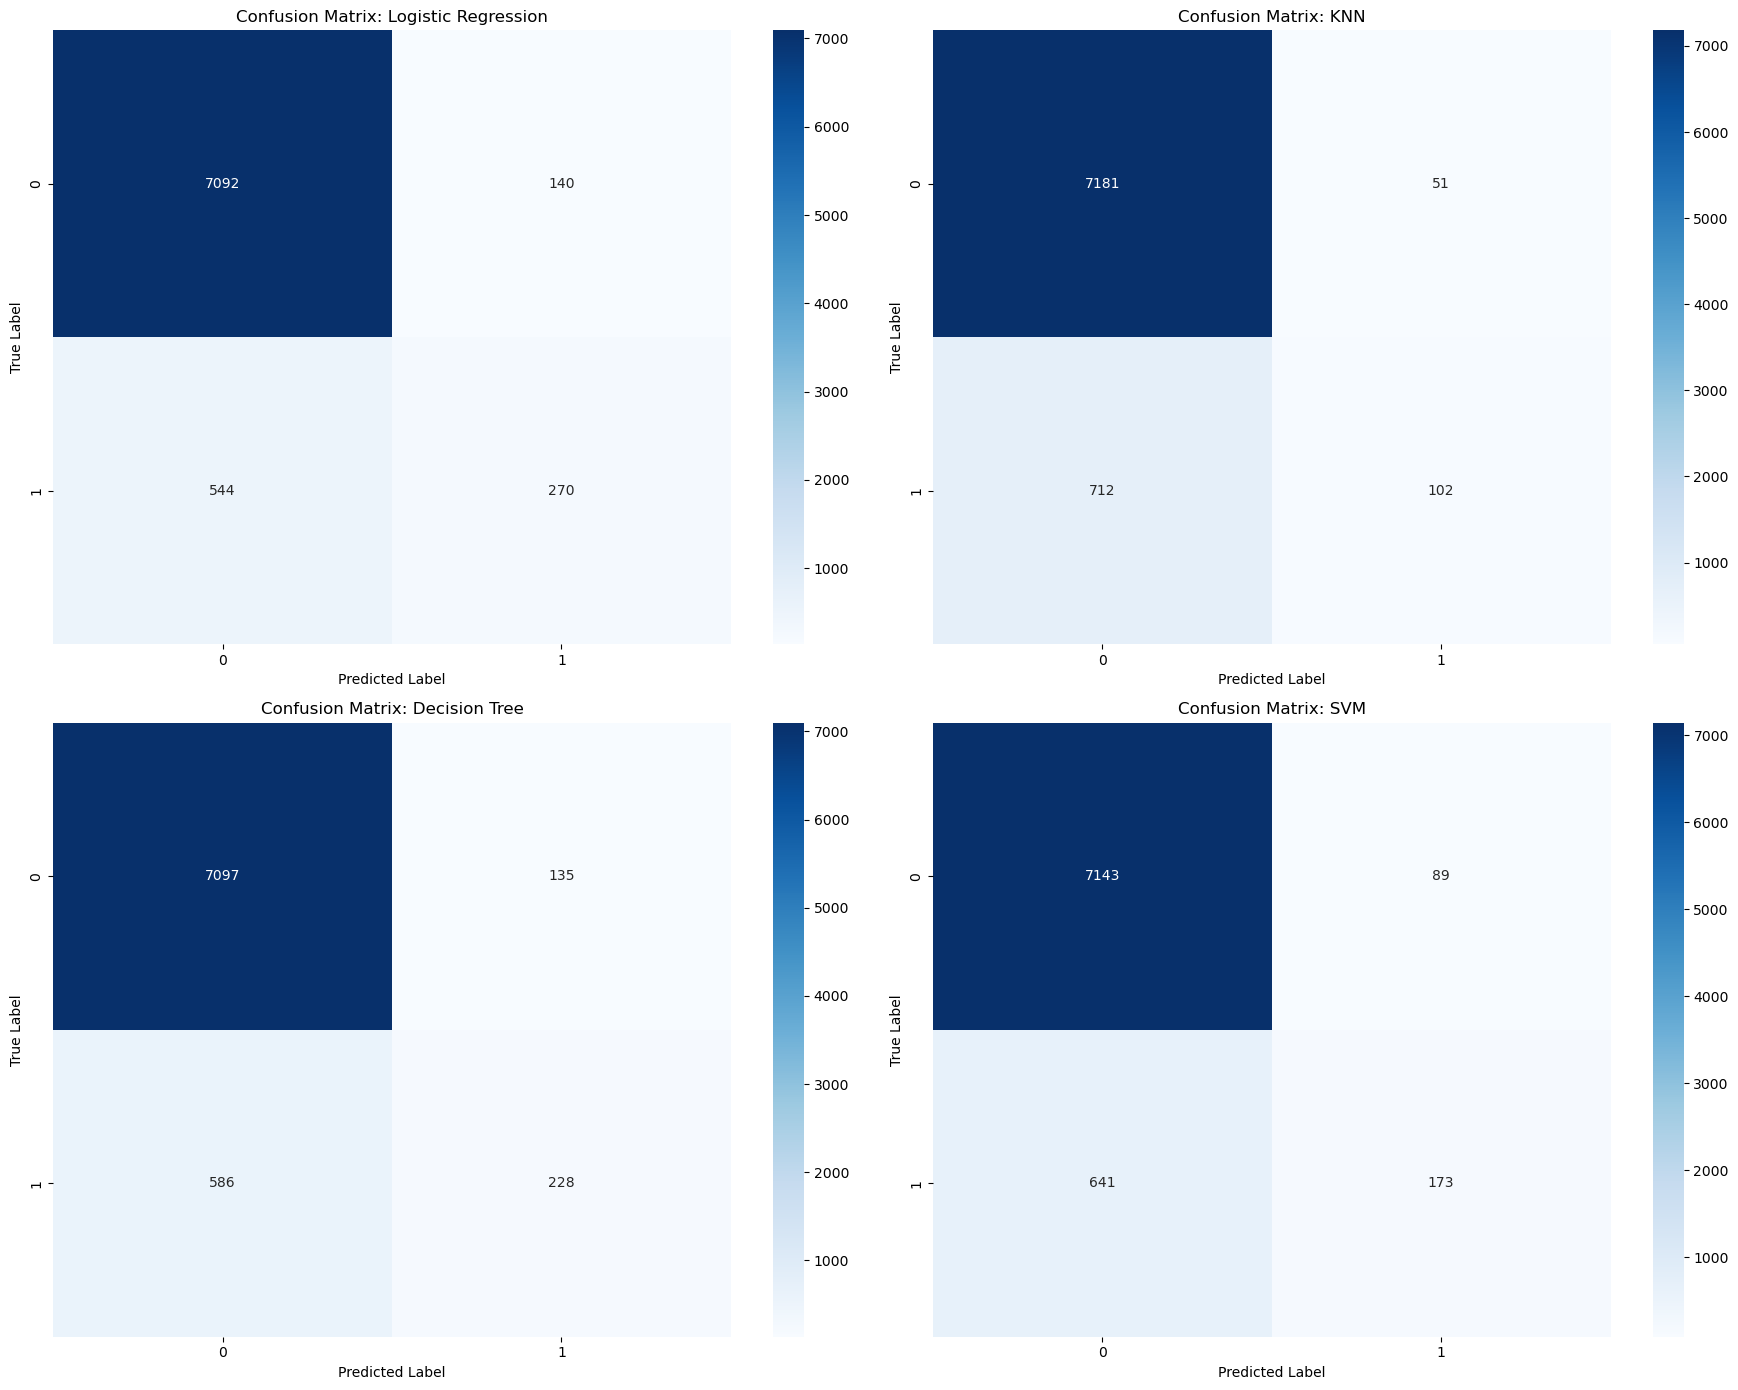

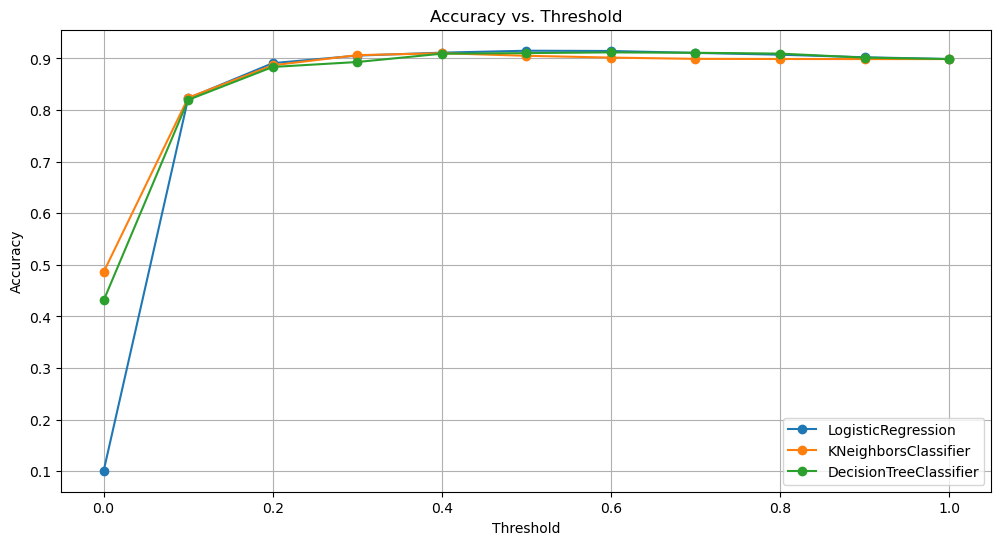

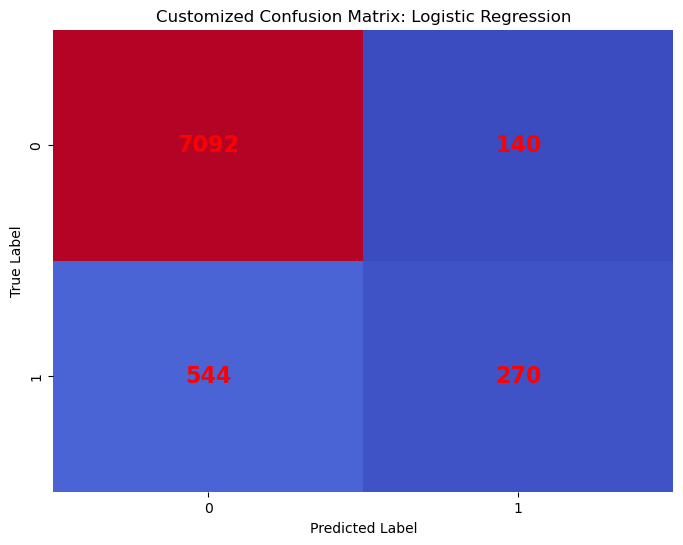

In [133]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the best models and their predictions
# best_lr, best_knn, best_dt, best_svm are your best models
# y_pred_lr, y_pred_knn, y_pred_dt, y_pred_svm are the corresponding predictions

# 1. Confusion Matrices for all classifiers
model_preds = [y_pred_lr, y_pred_knn, y_pred_dt, y_pred_svm]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']

plt.figure(figsize=(18, 14))
for i, (pred, name) in enumerate(zip(model_preds, model_names)):
    plt.subplot(2, 2, i+1)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# 2. Plotting Accuracy vs. Threshold (assuming you've calculated probabilities for each model)
# Replace model_prob with the actual probabilities you've calculated
thresholds = np.arange(0, 1.1, 0.1)
models = [best_lr, best_knn, best_dt]  # Assuming these models have predict_proba method

plt.figure(figsize=(12, 6))
for model in models:
    model_prob = model.predict_proba(X_test_scaled)[:, 1]
    accuracies = [accuracy_score(y_test, (model_prob > t).astype(int)) for t in thresholds]
    plt.plot(thresholds, accuracies, marker='o', label=model.__class__.__name__)
plt.title('Accuracy vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 3. Customized Confusion Matrix
# You can customize the confusion matrix to focus on specific aspects like highlighting certain cells
cm_custom = confusion_matrix(y_test, y_pred_lr)  # Replace with the model you want
plt.figure(figsize=(8, 6))
sns.heatmap(cm_custom, annot=True, fmt="d", cmap='coolwarm', cbar=False,
            annot_kws={"size": 16, "weight": "bold", "color": "red"})
plt.title('Customized Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Radial Chart for Model Metrics

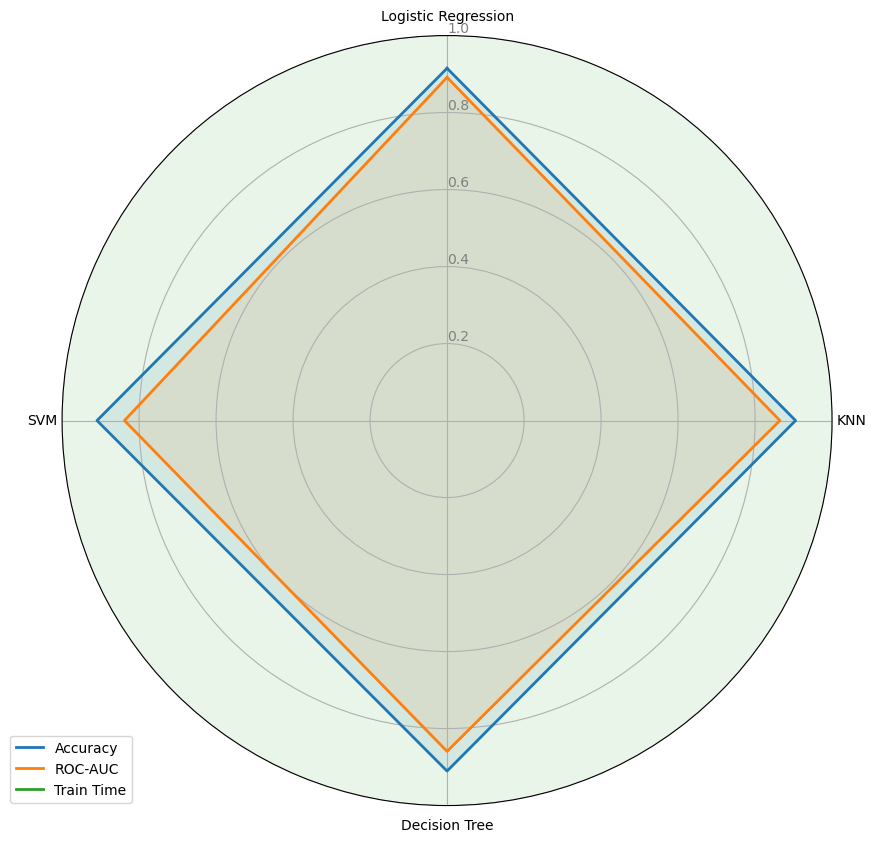

In [138]:
from math import pi
import pandas as pd
import matplotlib.pyplot as plt

# Set data
df = pd.DataFrame({
    'Metrics': ['Accuracy', 'ROC-AUC', 'Train Time'],
    'Logistic Regression': [0.915, 0.8914, best_lr_time],
    'KNN': [0.9052, 0.8645, best_knn_time],
    'Decision Tree': [0.9104, 0.8593, best_dt_time],
    'SVM': [0.9093, 0.8379, best_svm_time]
})

# Number of variables
categories = list(df)[1:]
N = len(categories)

# Compute the angles for the axes
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Plotting
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# First axis on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable and add labels
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=10)
plt.ylim(0, 1)

# Plot each individual = each line of the data
for i, row in df.iterrows():
    values = row.drop('Metrics').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=row['Metrics'])
    ax.fill(angles, values, alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()




### Precision-Recall Curve:
This can be a great alternative to ROC-AUC for imbalanced datasets.

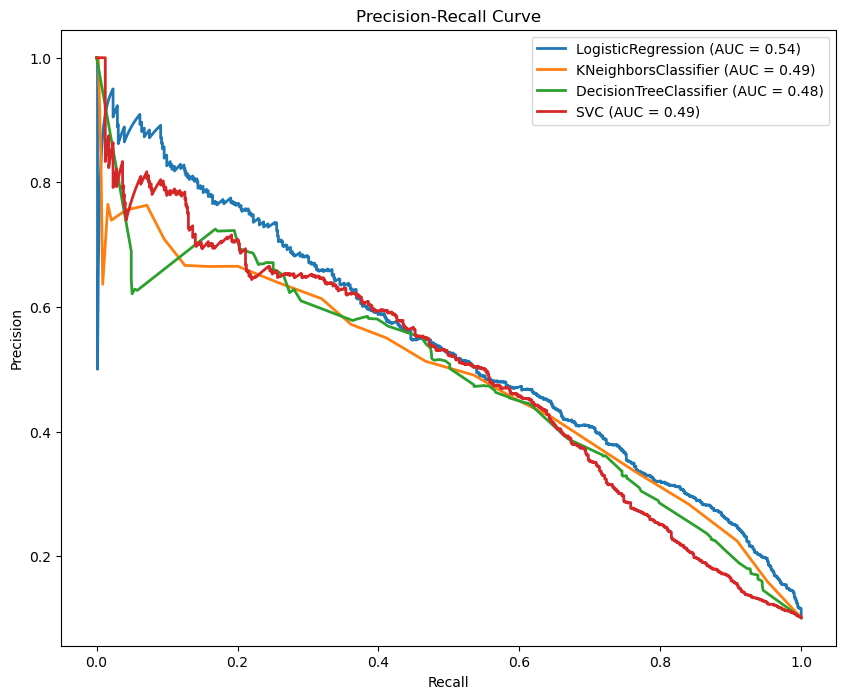

In [135]:
from sklearn.metrics import precision_recall_curve, auc
plt.figure(figsize=(10, 8))

for model in [best_lr, best_knn, best_dt, best_svm]:
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test_scaled)
    else:
        y_score = model.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    plt.plot(recall, precision, lw=2, label=f'{model.__class__.__name__} (AUC = {auc(recall, precision):.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()


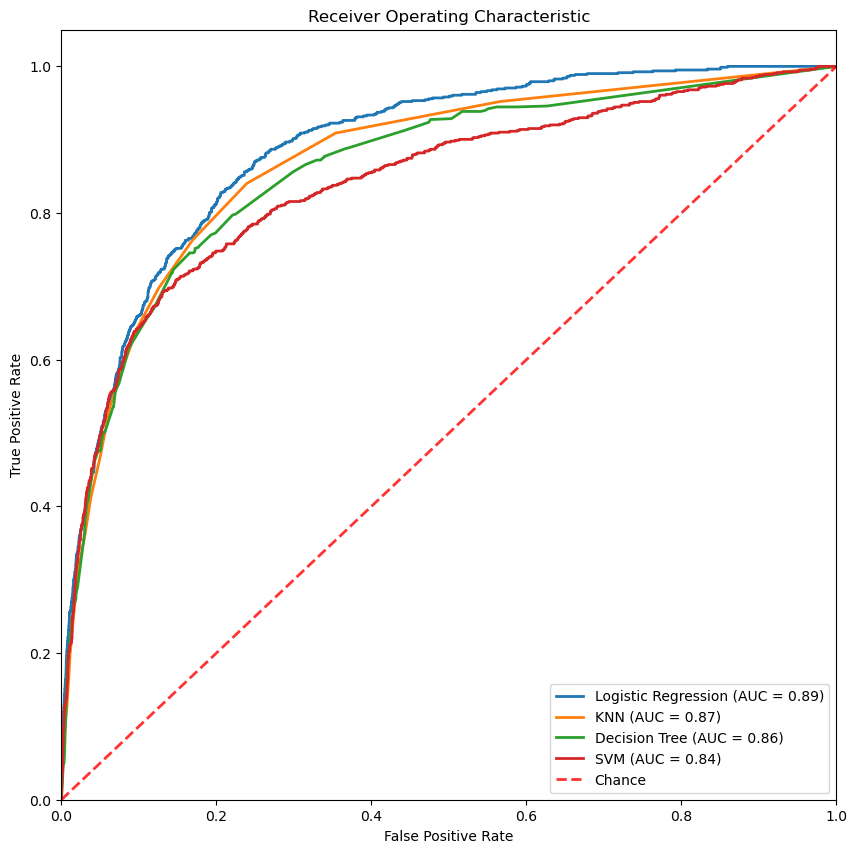

AUC Scores: [0.8886517878497967, 0.8700636571557478, 0.859633797237503, 0.8406038341740775]


In [139]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize an empty list to store ROC-AUC scores for each model
roc_auc_scores = []

# Models and their labels
models = [best_lr, best_knn, best_dt, best_svm]
labels = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']

plt.figure(figsize=(10, 10))

# Loop through each model to plot the ROC curve
for model, label in zip(models, labels):
    
    # For models that can predict probabilities
    if hasattr(model, "predict_proba"):
        probas_ = model.predict_proba(X_test_scaled)
        fpr, tpr, _ = roc_curve(y_test, probas_[:, 1])
    else:  # For models like SVM with decision_function
        decision_values = model.decision_function(X_test_scaled)
        fpr, tpr, _ = roc_curve(y_test, decision_values)
    
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Optional: You can also print or save the roc_auc_scores list
print("AUC Scores:", roc_auc_scores)



### Feature Importance Analysis

In [147]:
cat_cols = list(preprocessor_scaler.named_transformers_['cat'].get_feature_names_out())
columns = num_vars + cat_cols

In [148]:
feature_importance_lr = pd.DataFrame({'feature': columns, 'importance': best_lr.coef_[0]})
feature_importance_lr = feature_importance_lr.sort_values('importance', ascending=False)
feature_importance_lr.head(10)

,feature,importance
45,poutcome_success,1.424022
1,duration,1.039670
11,job_student,0.869021
8,job_retired,0.606437
13,job_unemployed,0.146367
26,education_unknown,0.135262
0,age,0.135077
23,education_illiterate,0.132594
14,job_unknown,0.087290
36,contact_cellular,0.060512


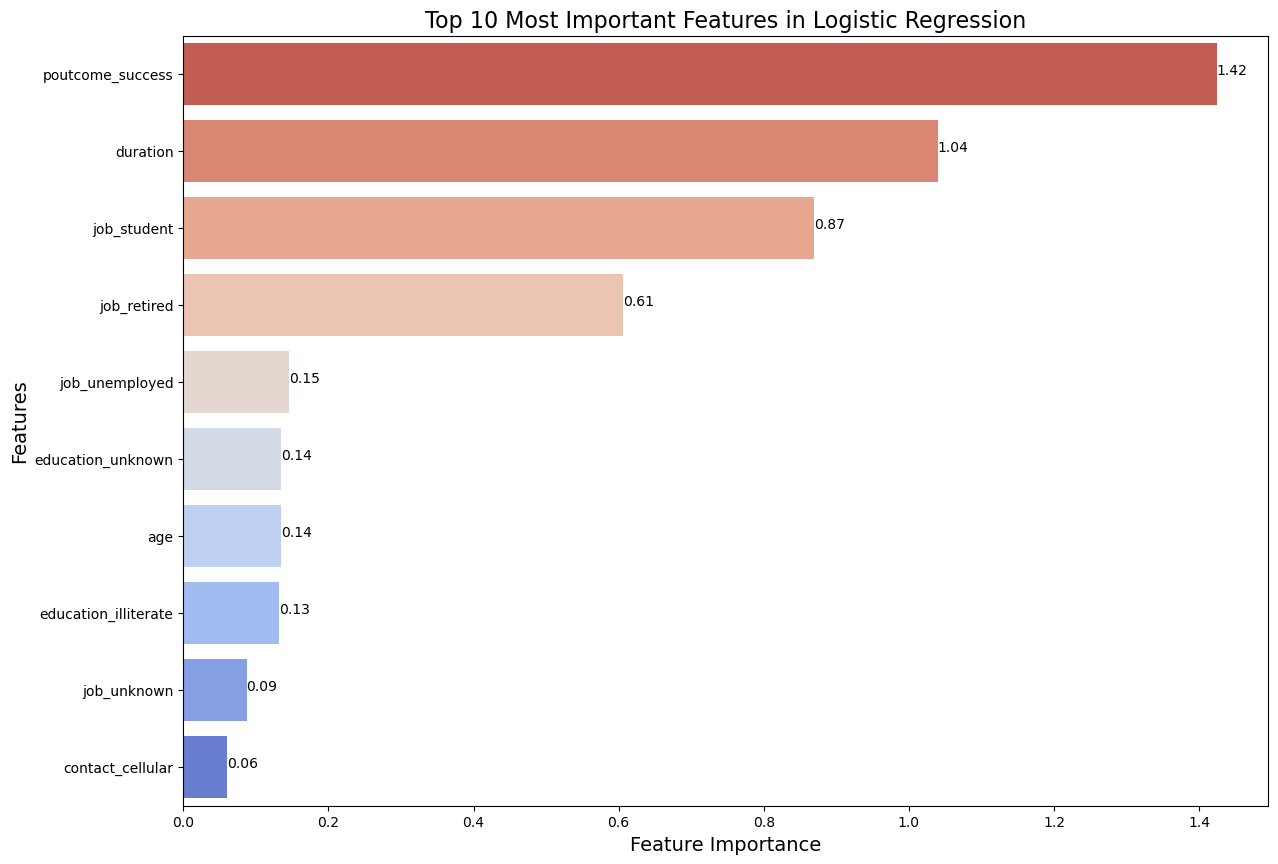

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 10))

# Create a color palette
palette = sns.color_palette("coolwarm_r", len(feature_importance_lr.head(10)))

# Create the horizontal bar chart
sns.barplot(x='importance', 
            y='feature', 
            data=feature_importance_lr.head(10), 
            palette=palette)

# Add labels and title
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 10 Most Important Features in Logistic Regression', fontsize=16)

# Annotate each bar
for index, value in enumerate(feature_importance_lr.head(10)['importance']):
    plt.text(value, index, f'{value:.2f}')

# Show the plot
plt.show()



## Findings and Actionable Insights:

1. **Key Drivers of Success:** The variables poutcome_success, duration, and job_student are the strongest predictors of a successful marketing campaign. These variables should be considered closely in future marketing strategies.

2. **Positive vs Negative Impact:**

- **Positive Impact:** High values of poutcome_success and duration are strong indicators of a likely positive outcome.
- **Negative Impact:** Features with negative coefficients, like Feature: 44 (which might be a specific job role, marital status, or other categorical variable), are strong indicators of a likely negative outcome.
3. **Less Influential Features:** Features like education_unknown, age, and education_illiterate have low importance and might be candidates for feature reduction in future models.

4. **Demographics:** Job roles like 'student' and 'retired' seem to be more responsive to the campaign, while others like 'unknown' are less responsive.

## Next Steps:

1. **Focus on Previous Success:** Given the high importance of poutcome_success, future campaigns could prioritize customers who had a successful outcome in the past.

2. **Duration Matters:** Since duration is a key variable, monitoring the length of interactions with customers could yield insights into potential success.

3. **Target Specific Demographics:** The job role of 'student' seems to positively impact the campaign. Consider targeting this demographic more aggressively in future campaigns.

4. **Feature Reduction:** Less important features could be dropped in future models to simplify the model without sacrificing performance.

5. **Further Investigation:** For features that have strong negative coefficients, a deeper dive is needed to understand why they are acting as strong negative indicators.

## Recommendations:

1. **Resource Allocation:** Allocate more resources to engage with customers who had a successful previous outcome and fall under the 'student' and 'retired' job roles.

2. **Personalize Campaigns:** Customize the messaging and offers for different job roles based on their responsiveness to past campaigns.

3. **Performance Monitoring:** Continuously monitor the duration of customer interactions and set alerts for interactions that fall below a certain threshold.

4. **Model Reiteration:** As new data is collected, the model should be retrained to keep it up-to-date. Consider using automated machine learning pipelines for this.

 **By focusing on these areas, the bank can improve the effectiveness of its future marketing campaigns and make better use of its resources.**